# Overview

This code demonstrates the NeuralNetwork class by training a neural network to recognize handwritten digits (the MNIST dataset)

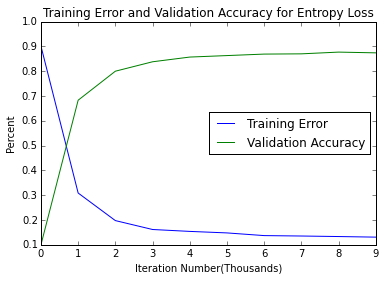

In [10]:
# Plot entropy loss
plt.plot(1-np.asarray(entropyNN.training_accuracy), label="Training Error")
plt.plot(np.asarray(entropyNN.validation_accuracy), label="Validation Accuracy")
plt.ylabel("Percent")
plt.xlabel("Iteration Number(Thousands)")
plt.title("Training Error and Validation Accuracy for Entropy Loss")
legend = plt.legend(loc="best")
plt.show()



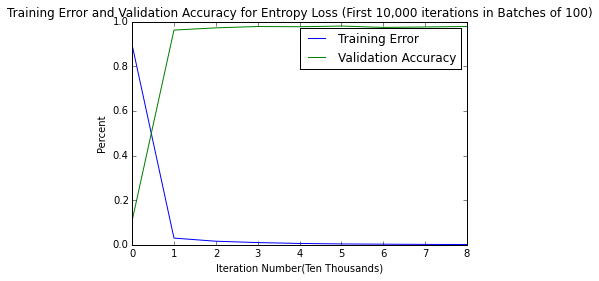

In [121]:
# Plot entropy loss
plt.plot(1-np.asarray(entropyNN.training_accuracy[0:9]), label="Training Error")
plt.plot(np.asarray(entropyNN.validation_accuracy[0:9]), label="Validation Accuracy")
plt.ylabel("Percent")
plt.xlabel("Iteration Number(Ten Thousands)")
plt.title("Training Error and Validation Accuracy for Entropy Loss (First 10,000 iterations in Batches of 100)")
legend = plt.legend(loc="best")
plt.show()

<function matplotlib.pyplot.show>

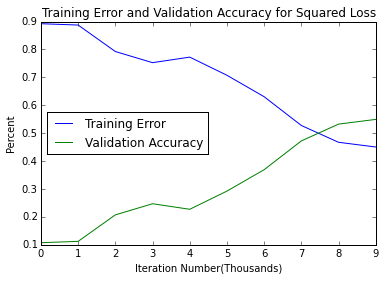

In [13]:
# Plot squared loss
plt.plot(1-np.asarray(squareNN.training_accuracy), label="Training Error")
plt.plot(np.asarray(squareNN.training_accuracy), label="Validation Accuracy")
legend = plt.legend(loc="best")
plt.ylabel("Percent")
plt.xlabel("Iteration Number(Thousands)")
plt.title("Training Error and Validation Accuracy for Squared Loss")
plt.show

<function matplotlib.pyplot.show>

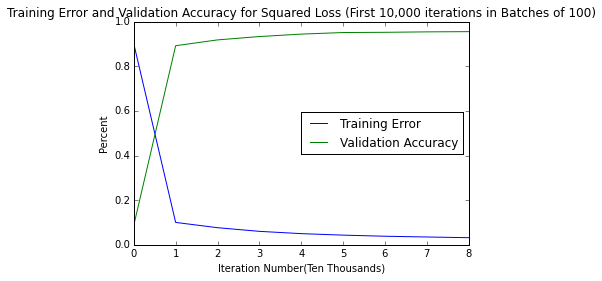

In [120]:
# Plot for batch size of 100, ran from 10,000x iterations
# Plot squared loss
plt.plot(1-np.asarray(squareNN.training_accuracy[0:9]), label="Training Error")
plt.plot(np.asarray(squareNN.validation_accuracy[0:9]), label="Validation Accuracy")
legend = plt.legend(loc="best")
plt.ylabel("Percent")
plt.xlabel("Iteration Number(Ten Thousands)")
plt.title("Training Error and Validation Accuracy for Squared Loss (First 10,000 iterations in Batches of 100)")
plt.show


In [1]:
import numpy as np
import random
import copy
import scipy.io
import timeit
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Load the data and create the data per row matrix format
data = scipy.io.loadmat("dataset/train")
num_images = data['train_images'].shape[2]
all_data = np.zeros((num_images, 28*28))
for i in xrange(0, num_images):
    digit= data['train_images'][:,:,i]/float(np.linalg.norm(data['train_images'][:,:,i], ord=2))
    digit =(digit.flatten())  
    all_data[i] = digit
data['train_images'] = [] # my computer needs to free up memory
all_data_and_labels = np.hstack((all_data, np.ones((len(all_data),1)),  data['train_labels'],))
#all_data_and_labels = np.hstack((all_data,   data['train_labels'],))
del data # my computer needs to free up memory
del all_data # my computer needs to free up memory
# Shuffle the data in place to not use more memory
np.random.shuffle(all_data_and_labels)
# Create training and validation sets
Xtrain = all_data_and_labels[0:59000, :-1]
Ytrain = all_data_and_labels[0:59000, -1]
Xvalid = all_data_and_labels[59000:, :-1]
Yvalid = all_data_and_labels[59000:, -1]
del all_data_and_labels # my computer needs to free up memory

In [9]:
entropyNN = NeuralNetwork(784, 200, 10, "entropy")
entropyNN.train(Xtrain, Ytrain, Xvalid, Yvalid, 10000, 10)

Current training accuracy: 	0.098813559322
Current Validation accuracy: 	0.1
Current training accuracy: 	0.691186440678
Current Validation accuracy: 	0.683
Current training accuracy: 	0.802389830508
Current Validation accuracy: 	0.8
Current training accuracy: 	0.838288135593
Current Validation accuracy: 	0.838
Current training accuracy: 	0.845966101695
Current Validation accuracy: 	0.857
Current training accuracy: 	0.85206779661
Current Validation accuracy: 	0.863
Current training accuracy: 	0.862881355932
Current Validation accuracy: 	0.869
Current training accuracy: 	0.864576271186
Current Validation accuracy: 	0.87
Current training accuracy: 	0.866694915254
Current Validation accuracy: 	0.877
Current training accuracy: 	0.869084745763
Current Validation accuracy: 	0.874


In [83]:
squareNN = NeuralNetwork("square")
squareNN.train(Xtrain, Ytrain, Xvalid, Yvalid, 10000, 10)

Iteration number: 	 	0
Time elapsed: 	 	0.01076305264
Current training accuracy: 	0.112203389831
Current Validation accuracy: 	0.113
Iteration number: 	 	1000
Time elapsed: 	 	11.1146776729
Current training accuracy: 	0.204983050847
Current Validation accuracy: 	0.192
Iteration number: 	 	2000
Time elapsed: 	 	22.2261682435
Current training accuracy: 	0.221677966102
Current Validation accuracy: 	0.213
Iteration number: 	 	3000
Time elapsed: 	 	33.2267090959
Current training accuracy: 	0.219288135593
Current Validation accuracy: 	0.219
Iteration number: 	 	4000
Time elapsed: 	 	44.3246029398
Current training accuracy: 	0.234525423729
Current Validation accuracy: 	0.218
Iteration number: 	 	5000
Time elapsed: 	 	55.3208049241
Current training accuracy: 	0.315338983051
Current Validation accuracy: 	0.302


KeyboardInterrupt: 

In [ ]:
# Predict on the test dataset and save the predictions to a csv file
test_predictions= NN.predict(Xtest)
test_numbers=[np.argmax(row) for row in test_predictions]
ids = np.arange(1,10001).reshape(10000, 1)
test_numbers=np.array(test_numbers).reshape(10000, 1)
output = np.hstack((ids, test_numbers))
np.savetxt('test_predictions.csv',  output, fmt='%d', delimiter=',')

In [112]:
entropyNN.train(Xtrain, Ytrain, Xvalid, Yvalid, 250000, 100)

Iteration number: 	 	0
Time elapsed: 	 	 	0.0263067588312
Current training accuracy: 	0.104389830508
Current Validation accuracy: 	0.108
Iteration number: 	 	10000
Time elapsed: 	 	 	225.736201904
Current training accuracy: 	0.97
Current Validation accuracy: 	0.962
Iteration number: 	 	20000
Time elapsed: 	 	 	422.028456781
Current training accuracy: 	0.983966101695
Current Validation accuracy: 	0.972
Iteration number: 	 	30000
Time elapsed: 	 	 	620.944370293
Current training accuracy: 	0.990050847458
Current Validation accuracy: 	0.978
Iteration number: 	 	40000
Time elapsed: 	 	 	842.112278198
Current training accuracy: 	0.993881355932
Current Validation accuracy: 	0.977
Iteration number: 	 	50000
Time elapsed: 	 	 	1067.31904403
Current training accuracy: 	0.996152542373
Current Validation accuracy: 	0.98
Iteration number: 	 	60000
Time elapsed: 	 	 	1334.08778321
Current training accuracy: 	0.997186440678
Current Validation accuracy: 	0.974
Iteration number: 	 	70000
Time elapsed:

KeyboardInterrupt: 

In [97]:
squareNN.train(Xtrain, Ytrain, Xvalid, Yvalid, 250000, 100)

Iteration number: 	 	0
Time elapsed: 	 	 	0.0273541025999
Current training accuracy: 	0.985966101695
Current Validation accuracy: 	0.969
Iteration number: 	 	10000
Time elapsed: 	 	 	209.048886455
Current training accuracy: 	0.987
Current Validation accuracy: 	0.972
Iteration number: 	 	20000
Time elapsed: 	 	 	409.237664928
Current training accuracy: 	0.98786440678
Current Validation accuracy: 	0.973
Iteration number: 	 	30000
Time elapsed: 	 	 	609.881714413
Current training accuracy: 	0.988338983051
Current Validation accuracy: 	0.974
Iteration number: 	 	40000
Time elapsed: 	 	 	812.487789989
Current training accuracy: 	0.988762711864
Current Validation accuracy: 	0.97
Iteration number: 	 	50000
Time elapsed: 	 	 	1014.18021096
Current training accuracy: 	0.989355932203
Current Validation accuracy: 	0.972
Iteration number: 	 	60000
Time elapsed: 	 	 	1216.0137788
Current training accuracy: 	0.989542372881
Current Validation accuracy: 	0.972
Iteration number: 	 	70000
Time elapsed: 

Implementation notes are as follows:

Learning rate: The learning rate is initialized to be 0.01 and then decreased by 10 percent every 1000 iterations. When training is subsequently called again, the training rate is reinitialized to 0.01

Stopping condition: The change in the training accuracy rate is calculated per iteration, and if the absolute change in the accuracy is less than 1E-5, then the training stops. For Kaggle, I kept on calling the training function for as much time as I had before the submission deadline.  

Weights: The weights were initialized to be drawn from a uniform random distribution between 0 and 0.01. 

Training set and Validation set: The data was randomly shuffled in place to save memory and then 59000 samples were separated into the training set and 1000 samples were separated into the validation set. 

Training error and validation accuracy: Graphs of training error and validation accuracy are shown below. The neural network trained on entropy loss converged faster than the neural network trained on squared loss, with an asymptotic curve versus the squared loss' more linear improvement. After 10000 iterations, the entropy loss resulted in lower training error of 0.127 vs the squared loss' training error of 0.462. Likewise, the entropy loss' validation accuracy of 0.881 is higher than the squared loss' validation accuracy of 0.438. After 10000 iterations of 100 points, entropy has a better training accuracy. To summarize, the neural network trained on entropy is better, because it's training error decreases faster and the validation accuracy increases faster than the neural network trained on squared loss

Running time: See python output. Entropy is slightly slower. I probably trained it for several hours in total. Around the 0.9 percent accuracy rate, the score increassed really slowly. Prediction score: \textbf{0.9668}.

Extra features: I implemented batch gradient descent with a user specified number of desired samples per batch. I used batch sizes of 10 due to concern about running out of memory or needing to stop training. 
